
#Introduction

The banking industry has always been one of the early adopters of data science, and the credit card department is no exception. In the current scenario, where banks face increasing competition and customer expectations, it is crucial to acquire new credit card customers while maintaining a healthy credit risk portfolio. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, which aids in evaluating an applicant's creditworthiness and estimating their level of risk. This system uses a combination of application data, Credit Bureau Scores, and other internal information to make informed credit decisions. With the rise of big data and machine learning, banks are now incorporating outside data to enhance their credit judgements further.

Credit_card.csv

Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size

Credit_card_label.csv

Ind_ID: Client ID

Label: 0 is application approved and 1 is application rejected.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading datasets
cc1 = pd.read_csv("/content/credit_card_csv.csv")
cc2 = pd.read_csv("/content/credit_card_label.csv")


In [4]:
#Creating a copy 
df1 = cc1.copy()  
df2 = cc2.copy()  

In [5]:
df1.head()   # showing first 5 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
df1.tail()   # showing last 5 rows

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2


In [6]:
df1.shape   # shows shape of the dataset

(1548, 18)

In [7]:
df2.head()   

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [8]:
df2.tail() 

,Ind_ID,label
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0
1547,5053790,0


In [9]:
df2.shape

(1548, 2)

In [10]:
df=pd.merge(df1,df2,how='inner',on='Ind_ID')   #merging both dataset using inner join based on common column IND_ID

#Basic Data Exploration

In [11]:
df.head()  

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [12]:
df.tail()  

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [13]:
df.shape

(1548, 19)

In [14]:
df.info()   #Basic information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [15]:
df.describe(include = "all")     #describe the dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [16]:
df.nunique()       #checking unique value present in each column

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [17]:
len(df['Ind_ID']) - len(df['Ind_ID'].unique())   # Checking duplicate value

0

In [18]:
df['label'].value_counts() 

0    1373
1     175
Name: label, dtype: int64

Total we have 1373 records (0) for Approved and 175(1) for Rejected.
The data is highly imbalanced. 

In [19]:
df.isnull().sum() #shows total null values in each column

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [24]:
df=df.drop(['Type_Occupation','Phone','Work_Phone','Mobile_phone','EMAIL_ID'],axis=1)  # dropping column that are not useful

In [25]:
df.isnull().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count    22
Employed_days      0
Family_Members     0
label              0
dtype: int64

In [26]:
df['GENDER']=df['GENDER'].fillna(df['GENDER'].mode()[0])  #Relacing missing values with mode

In [27]:
# Checking Min , Max values from 'Birthday_count' column
print('Min Birthday_count :', df['Birthday_count'].min(),'\nMax Birthday_count :',df['Birthday_count'].max())

Min Birthday_count : -24946.0 
Max Birthday_count : -7705.0


In [28]:
# Converting 'Birthday_count' values from Day to Years
df['Birthday_count'] = round(df['Birthday_count']/-365,0)
df.rename(columns={'Birthday_count':'AGE_YEARS'}, inplace=True)

In [29]:
# if 'Employed_days' is positive no, it means person currently unemployed, therefore replacing it with 0
df['Employed_days'] = df['Employed_days'].apply(lambda x: 0 if x>0 else x)


In [30]:
# Converting 'Employed_days' values from Day to Years
df['Employed_days'] = abs(round(df['Employed_days']/-365,0))
df.rename(columns={'Employed_days':'YEARS_EMPLOYED'}, inplace=True)  

In [31]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
AGE_YEARS         22
YEARS_EMPLOYED     0
Family_Members     0
label              0
dtype: int64

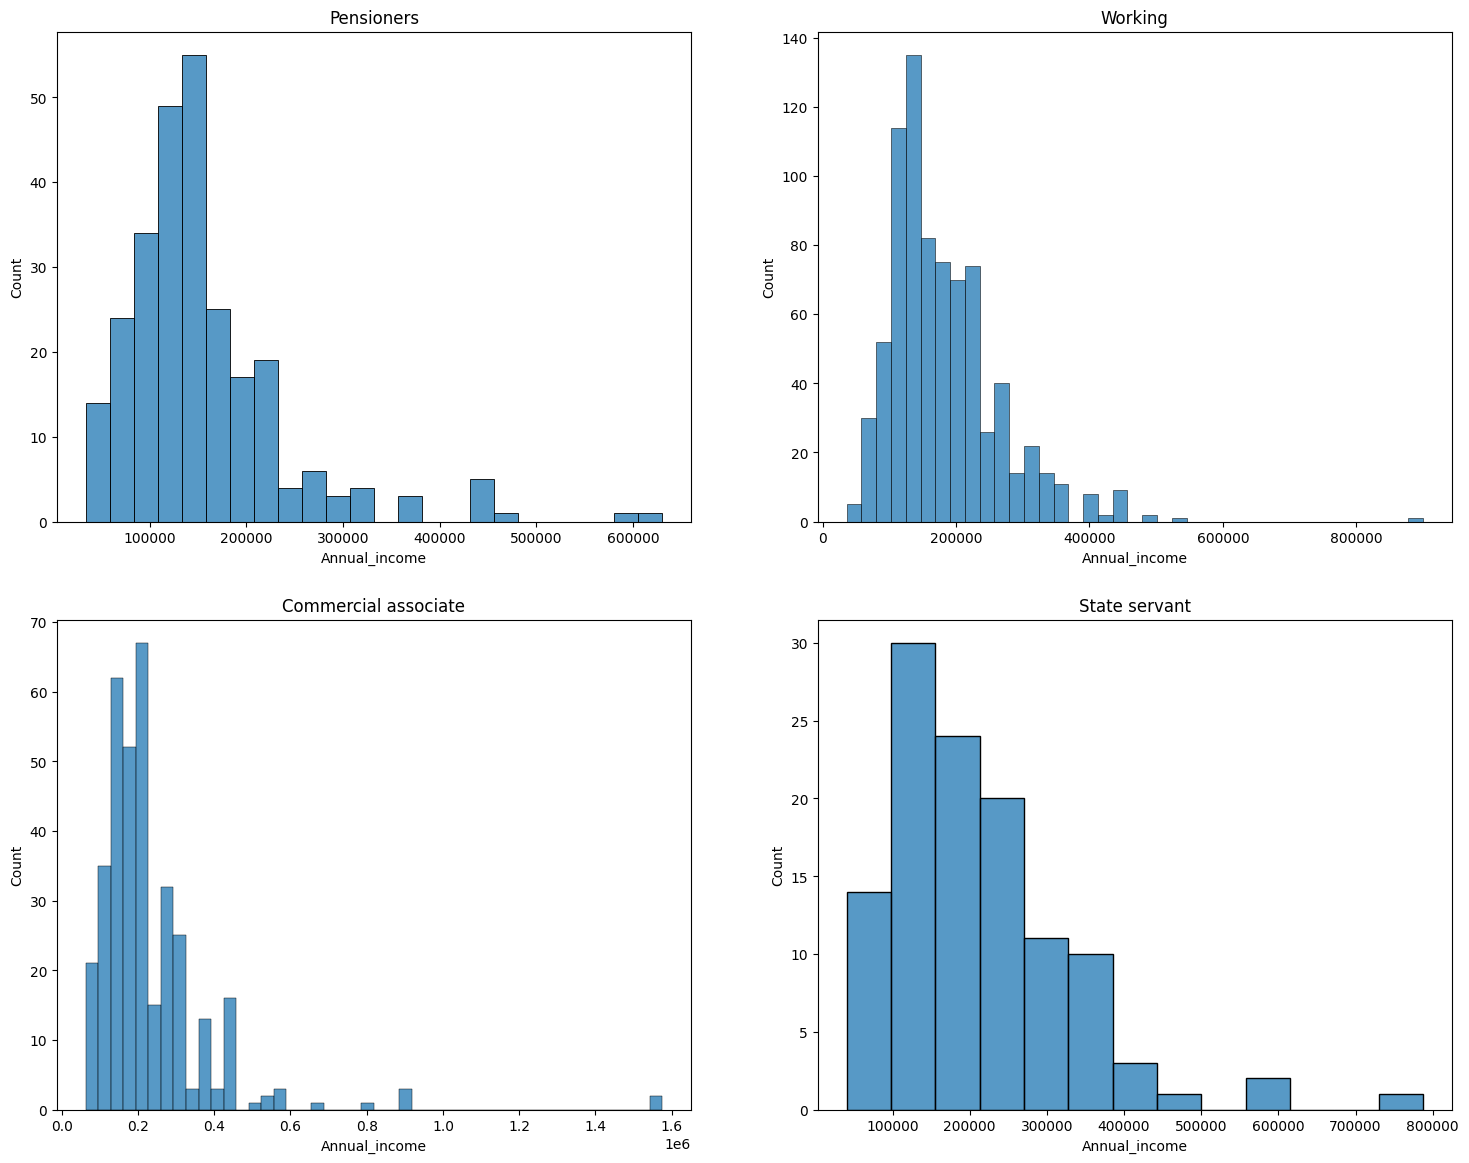

In [32]:
#distribution of Annual_income for each income type
figure,axis=plt.subplots(2,2)
sns.histplot(x='Annual_income',data=df[df['Type_Income']=='Pensioner'],ax=axis[0,0]).set(title='Pensioners')
sns.histplot(x='Annual_income',data=df[df['Type_Income']=='Working'],ax=axis[0,1]).set(title='Working')
sns.histplot(x='Annual_income',data=df[df['Type_Income']=='Commercial associate'],ax=axis[1,0]).set(title='Commercial associate')
sns.histplot(x='Annual_income',data=df[df['Type_Income']=='State servant'],ax=axis[1,1]).set(title='State servant')
figure.set_size_inches(18,14)

In [33]:
#checking null annual income records for each income type
df[df['Annual_income'].isnull()]['Type_Income'].value_counts()

Working                 11
Commercial associate     8
Pensioner                4
Name: Type_Income, dtype: int64

In [34]:
# Calculating mean annual income for seperate income type
mean_pension=round(df[df['Type_Income']=='Pensioner']['Annual_income'].mean())
mean_working=round(df[df['Type_Income']=='Working']['Annual_income'].mean())
mean_commercial=round(df[df['Type_Income']=='Commercial associate']['Annual_income'].mean())

In [35]:
def impute_income(a):
    income = a[0]
    iclass = a[1]
    
    if pd.isnull(income):
      if  iclass== 'Pensioner':
        return mean_pension
      elif iclass == 'Working':
        return mean_working
      else:
        return mean_commercial
    else:
      return income

In [42]:
#replacing null values of Annual_income with mean for each income type
df['Annual_income'] = df[['Annual_income','Type_Income']].apply(impute_income,axis=1)

In [36]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
AGE_YEARS         22
YEARS_EMPLOYED     0
Family_Members     0
label              0
dtype: int64

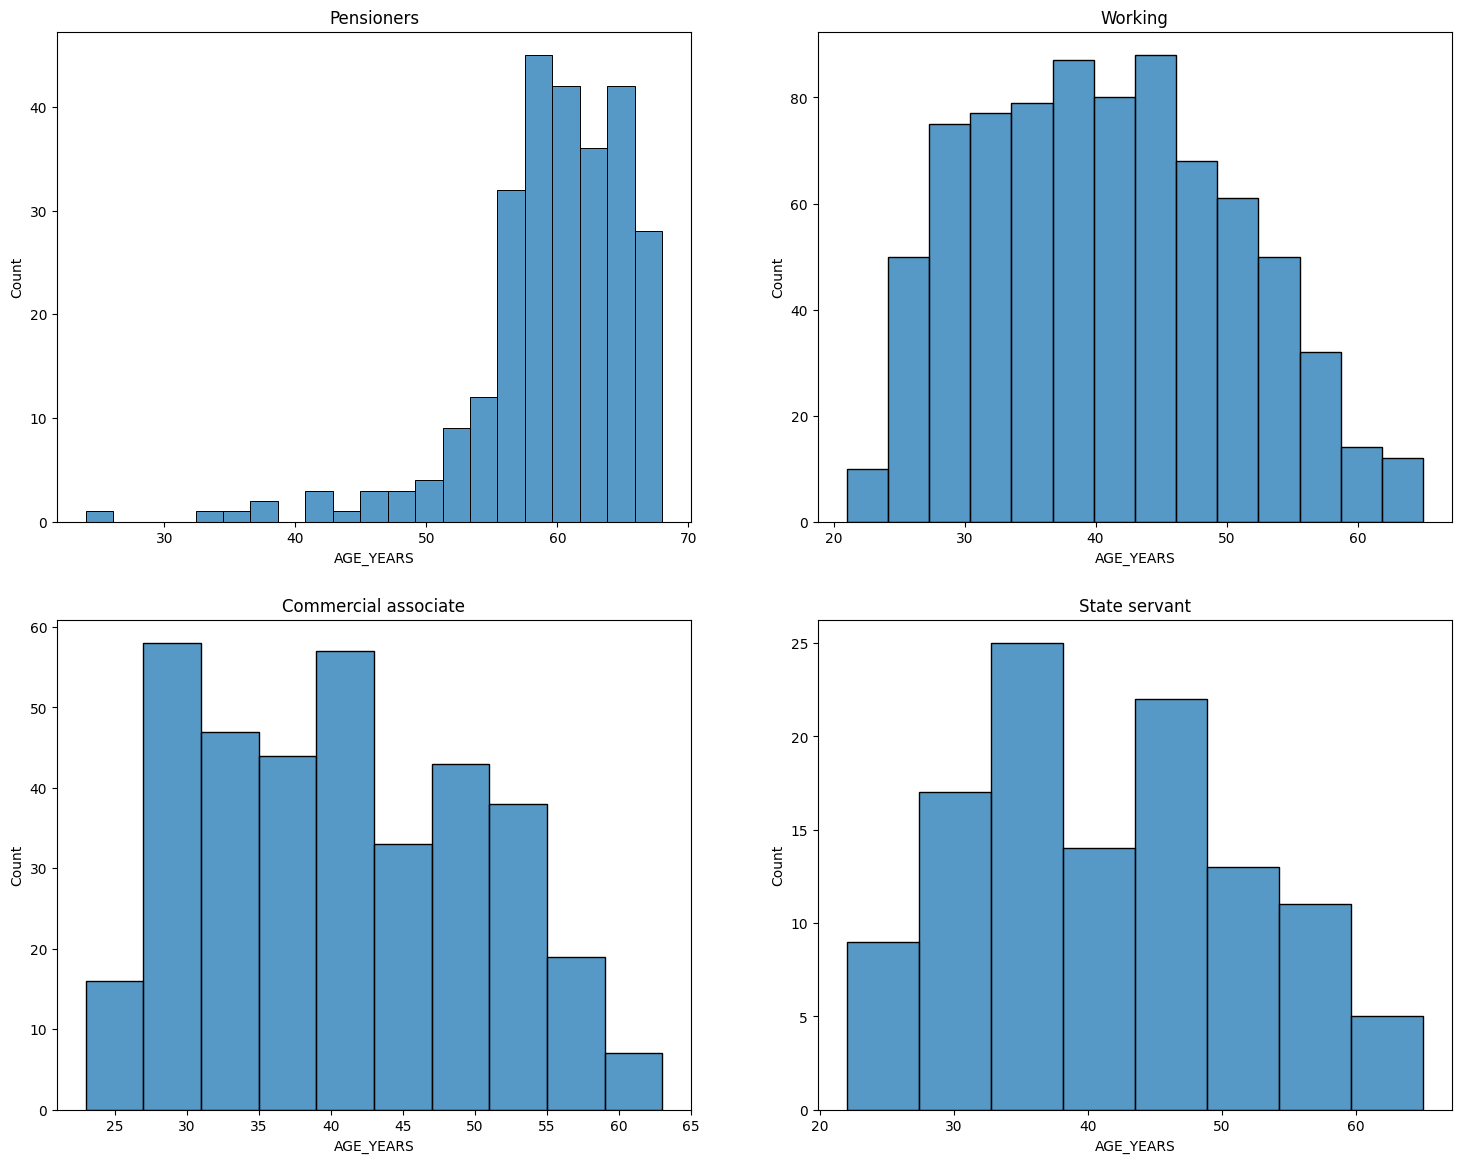

In [37]:
#distribution of Age for different income types 
figure,axis=plt.subplots(2,2)
sns.histplot(x='AGE_YEARS',data=df[df['Type_Income']=='Pensioner'],ax=axis[0,0]).set(title='Pensioners')
sns.histplot(x='AGE_YEARS',data=df[df['Type_Income']=='Working'],ax=axis[0,1]).set(title='Working')
sns.histplot(x='AGE_YEARS',data=df[df['Type_Income']=='Commercial associate'],ax=axis[1,0]).set(title='Commercial associate')
sns.histplot(x='AGE_YEARS',data=df[df['Type_Income']=='State servant'],ax=axis[1,1]).set(title='State servant')
figure.set_size_inches(18,14)

In [38]:
# Calculating mean age for seperate income type
birth_working=round(df[df['Type_Income']=='Working']['AGE_YEARS'].mean())
birth_pension=round(df[df['Type_Income']=='Pensioner']['AGE_YEARS'].mean())
birth_commercial=round(df[df['Type_Income']=='Commercial associate']['AGE_YEARS'].mean())

In [39]:
def impute_birth(a):
    birth = a[0]
    iclass = a[1]
    if pd.isnull(birth):
      if  iclass== 'Pensioner':
        return birth_pension
      elif iclass == 'Working':
        return birth_working
      else:
        return birth_commercial
    else:
      return birth

In [40]:
df['AGE_YEARS'] = df[['AGE_YEARS','Type_Income']].apply(impute_birth,axis=1)

In [53]:
df.isnull().sum() 

GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
AGE_YEARS         0
YEARS_EMPLOYED    0
Family_Members    0
label             0
dtype: int64

No null is left all are handeled.

Checking Outliers

<Axes: xlabel='Annual_income'>

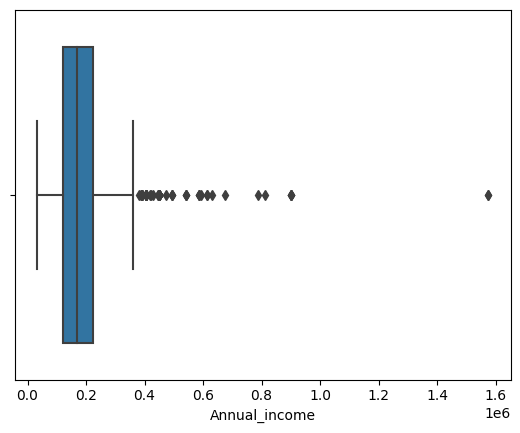

In [44]:
sns.boxplot(x='Annual_income',data=df) 

In [54]:
high_bound = df['Annual_income'].quantile(0.999)  #removing outlier
print('high_bound :', high_bound)

high_bound : 900000.0


In [47]:
df=df[df['Annual_income']<=high_bound]
     

<Axes: xlabel='CHILDREN', ylabel='count'>

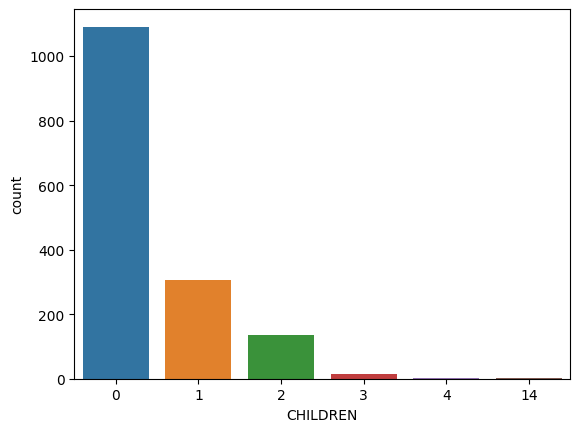

In [48]:
sns.countplot(x='CHILDREN',data=cc1)

In [49]:
high_bound = df['CHILDREN'].quantile(0.999)   #removing outlier
print('high_bound :', high_bound)

high_bound : 3.4550000000001546


In [50]:
df = df[df['CHILDREN']<=high_bound]

In [ ]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,0.0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,40.0,2.0,2,1
3,5009749,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,2,1


In [51]:
df.drop('Ind_ID', axis=1, inplace=True)

#Creating Visuals

<ipython-input-56-16230cf551d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


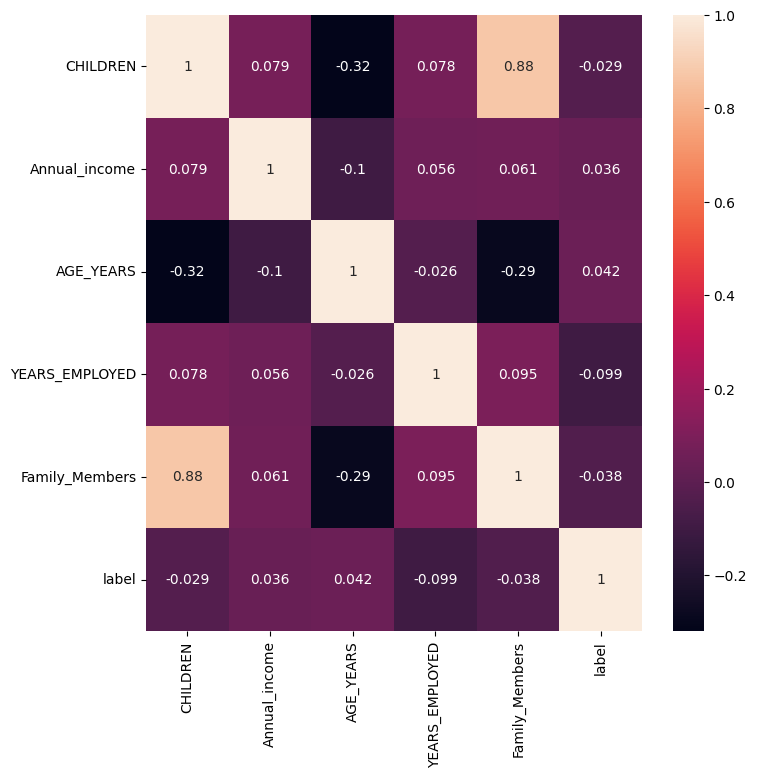

In [56]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

There is no feature which is highly co-related with 'Status'

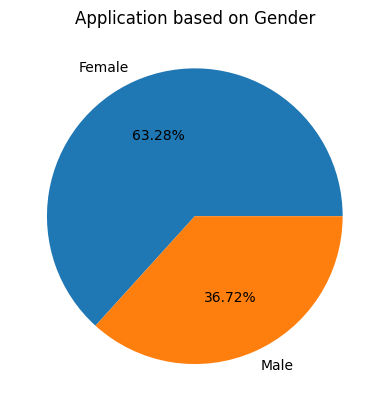

In [57]:
plt.pie(df['GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('Application based on Gender')
plt.show()

Females submitted more application than male

[Text(0.5, 1.0, 'Applications owning a car')]

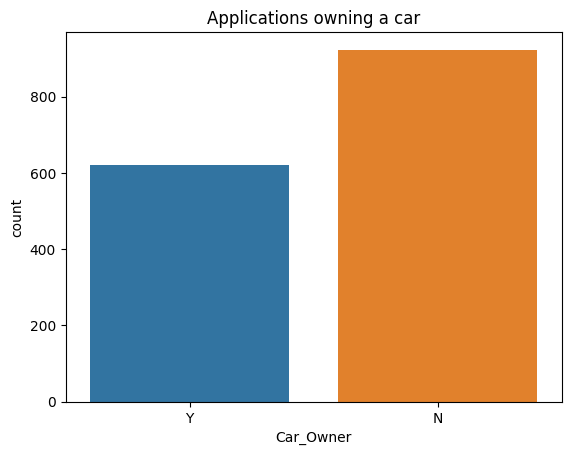

In [58]:
# This graph shows majority of applications dont own a car
sns.countplot(x='Car_Owner',data=df).set(title='Applications owning a car')

Majority of applications dont own a car

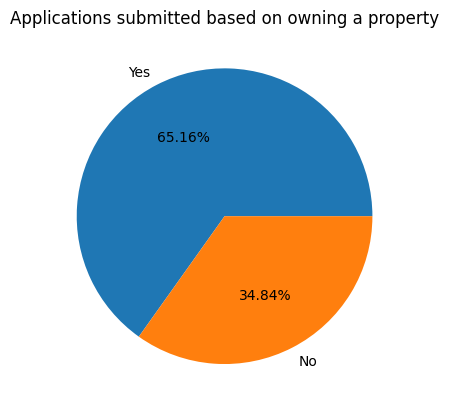

In [59]:
plt.pie(df['Propert_Owner'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('Applications submitted based on owning a property')
plt.show()

 Majority of applicatant's own a propert

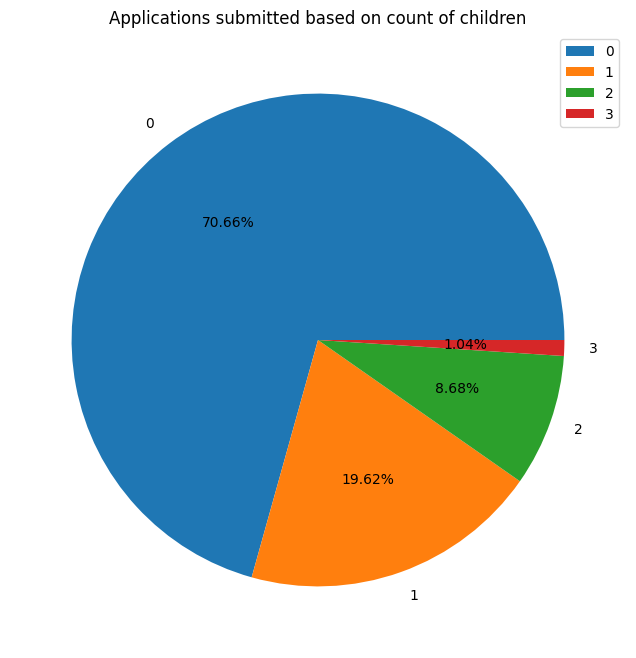

In [60]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (8,8))
plt.pie(df['CHILDREN'].value_counts(), labels=df['CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('Applications submitted based on count of children')
plt.legend()
plt.show()

Majority of applicatant's don't have any children

Text(0.5, 1.0, 'Income vs Family members')

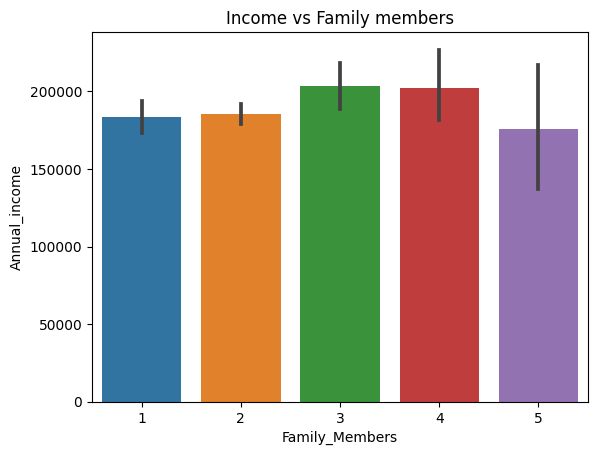

In [61]:
sns.barplot(x='Family_Members',y='Annual_income',data=df)
plt.title('Income vs Family members')

this shows that most families have 2 members

[Text(0.5, 1.0, 'Annual Income vs Age')]

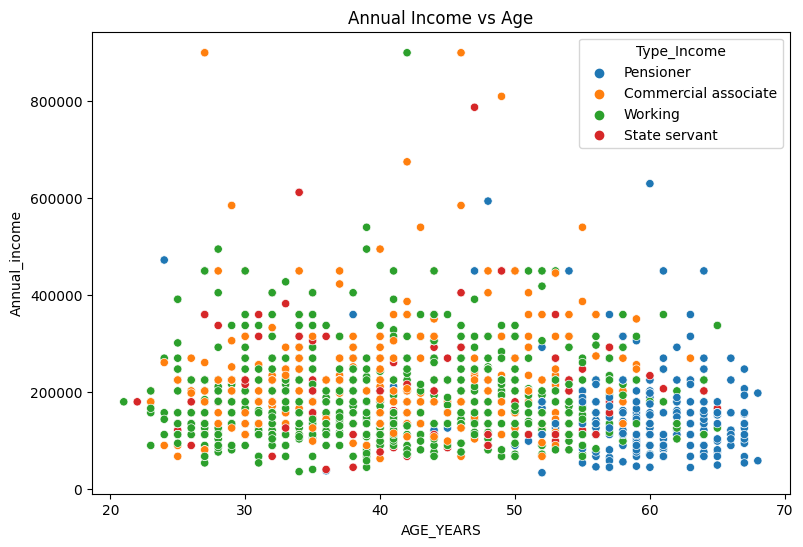

In [62]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='AGE_YEARS',y='Annual_income',data=df,hue='Type_Income').set(title='Annual Income vs Age')

 Commercial associates tend to have higher income 

#Preprocessing

In [63]:
cat_columns = df.columns[(df.dtypes =='object').values].tolist()  #non numeric columns
cat_columns

['GENDER',
 'Car_Owner',
 'Propert_Owner',
 'Type_Income',
 'EDUCATION',
 'Marital_status',
 'Housing_type']

In [64]:
from sklearn.preprocessing import LabelEncoder    #Converting non numeric columns to Numerical 
for i in cat_columns:
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i])

In [65]:
X = df.drop(['label'], axis=1)
Y = df['label']

In [66]:
from sklearn.model_selection import train_test_split #splitting data
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,stratify=Y,
                                                    random_state = 10)

In [67]:
from sklearn.preprocessing import MinMaxScaler  # scaling all values in the range 0 to 1 using MinMaxScaler
MMS = MinMaxScaler()
x_train = pd.DataFrame(MMS.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(MMS.transform(x_test), columns=x_test.columns)

In [68]:
x_train.head() #traiining data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members
0,0.0,1.0,1.0,0.000000,0.090909,1.000000,0.25,0.25,0.2,0.148936,0.024390,0.25
1,1.0,0.0,1.0,0.000000,0.220779,0.000000,1.00,0.25,0.2,0.234043,0.243902,0.25
2,0.0,0.0,1.0,0.000000,0.142857,0.333333,0.75,0.25,0.2,0.914894,0.000000,0.25
3,1.0,1.0,1.0,0.000000,0.116883,1.000000,1.00,0.25,0.2,0.170213,0.024390,0.25
4,1.0,0.0,1.0,0.333333,0.106494,1.000000,1.00,0.00,0.2,0.276596,0.000000,0.50


In [69]:
x_test.head(5)   #testing the data

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,AGE_YEARS,YEARS_EMPLOYED,Family_Members
0,0.0,0.0,1.0,0.000000,0.246753,0.000000,1.00,0.25,0.2,0.276596,0.195122,0.25
1,1.0,1.0,1.0,0.666667,0.480519,0.000000,0.25,0.25,0.2,0.595745,0.292683,0.75
2,0.0,0.0,1.0,0.000000,0.012468,0.333333,1.00,0.25,0.2,0.893617,0.000000,0.25
3,1.0,0.0,1.0,0.666667,0.376623,0.666667,0.25,0.25,0.2,0.489362,0.365854,0.75
4,0.0,0.0,1.0,0.666667,0.090909,1.000000,1.00,0.25,1.0,0.404255,0.024390,0.75


In [ ]:
#balancing data

In [70]:
y_train.value_counts()

0    958
1    122
Name: label, dtype: int64

<Axes: ylabel='count'>

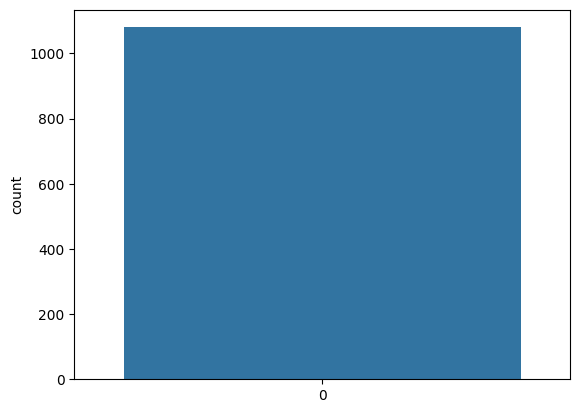

In [71]:
sns.countplot(y_train)


In [72]:
# adding samples to minority class 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_train_oversam, y_train_oversam = oversample.fit_resample(x_train, y_train)
x_test_oversam, y_test_oversam = oversample.fit_resample(x_test, y_test)

In [73]:
# label count after using SMOTE 
y_train_oversam.value_counts()

0    958
1    958
Name: label, dtype: int64

<Axes: ylabel='count'>

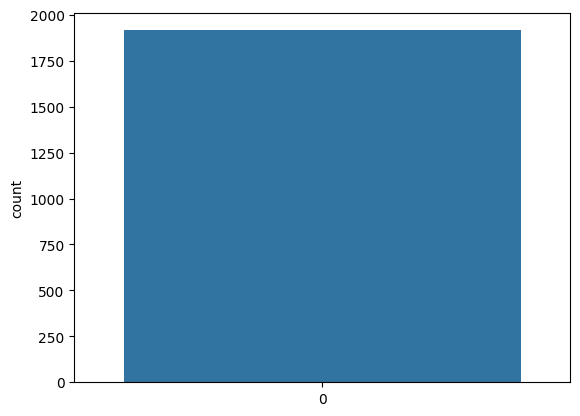

In [74]:
sns.countplot(y_train_oversam)

#ML models

In [75]:
acc_score=[]
models=[]

In [76]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

log_model = LogisticRegression()
log_model.fit(x_train_oversam, y_train_oversam)
prediction=log_model.predict(x_test_oversam)
print("Accuracy score using Logistic Regression =",accuracy_score(prediction,y_test_oversam))
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))
acc_score.append(accuracy_score(prediction,y_test_oversam))

Accuracy score using Logistic Regression = 0.5788834951456311

Classification report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       412
           1       0.58      0.55      0.57       412

    accuracy                           0.58       824
   macro avg       0.58      0.58      0.58       824
weighted avg       0.58      0.58      0.58       824



In [77]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)
decision_model.fit(x_train_oversam, y_train_oversam)
prediction=decision_model.predict(x_test_oversam)
print("Accuracy score using DecisionTreeClassifier =",accuracy_score(prediction,y_test_oversam))
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))
acc_score.append(accuracy_score(prediction,y_test_oversam))

Accuracy score using DecisionTreeClassifier = 0.7548543689320388

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       412
           1       0.82      0.66      0.73       412

    accuracy                           0.75       824
   macro avg       0.76      0.75      0.75       824
weighted avg       0.76      0.75      0.75       824



In [78]:
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(max_depth=12,min_samples_split=8)

decision_model.fit(x_train_oversam, y_train_oversam)
prediction=decision_model.predict(x_test_oversam)
print("Accuracy score using DecisionTreeClassifier =",accuracy_score(prediction,y_test_oversam))
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))
acc_score.append(accuracy_score(prediction,y_test_oversam))

Accuracy score using DecisionTreeClassifier = 0.7487864077669902

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       412
           1       0.82      0.64      0.72       412

    accuracy                           0.75       824
   macro avg       0.76      0.75      0.75       824
weighted avg       0.76      0.75      0.75       824



In [79]:

# XGBoost  classification
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(x_train_oversam, y_train_oversam)
prediction = XGB_model.predict(x_test_oversam)
print("Accuracy score using XGBoost =",accuracy_score(prediction,y_test_oversam))
print('\nClassification report:')      
print(classification_report(y_test_oversam, prediction))
acc_score.append(accuracy_score(prediction,y_test_oversam))

Accuracy score using XGBoost = 0.8980582524271845

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       412
           1       0.95      0.84      0.89       412

    accuracy                           0.90       824
   macro avg       0.90      0.90      0.90       824
weighted avg       0.90      0.90      0.90       824



Text(0, 0.5, 'Accuracy_score')

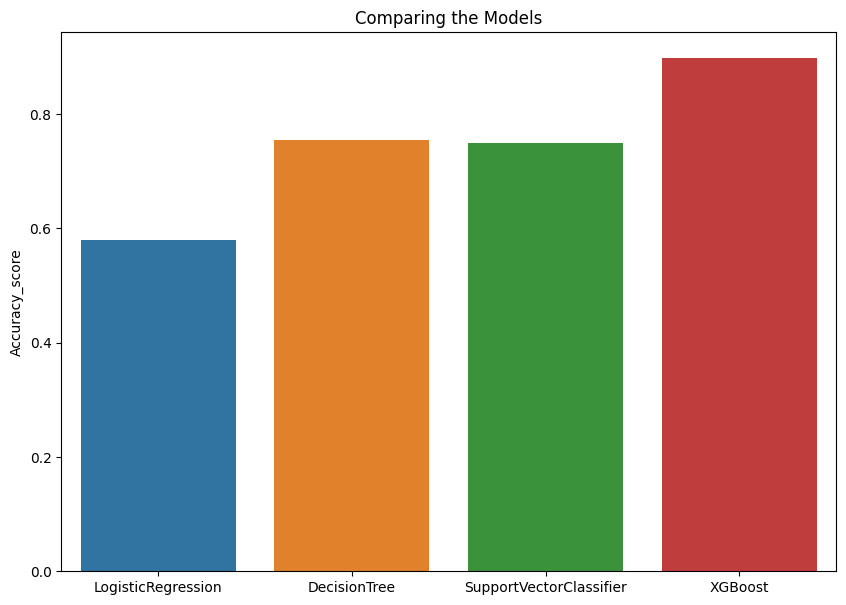

In [80]:
plt.figure(figsize=(10,7))
models=['LogisticRegression','DecisionTree','SupportVectorClassifier','XGBoost']
sns.barplot(x=models,y=acc_score).set(title='Comparing the Models')
plt.ylabel('Accuracy_score')

#Conclusion
We will use XGBoost Model for predicion because it has highest accuracy score. 
